https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


pull data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


display a training image and label

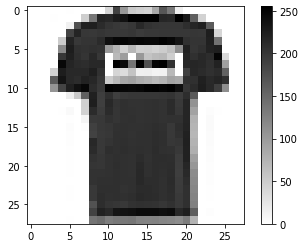

In [3]:
plt.figure('initial_inspection')
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


misc data analysis

In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


Pre process images for neural network processing

In [5]:
# scale everyting to between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

look at the first 10 preprocessed images

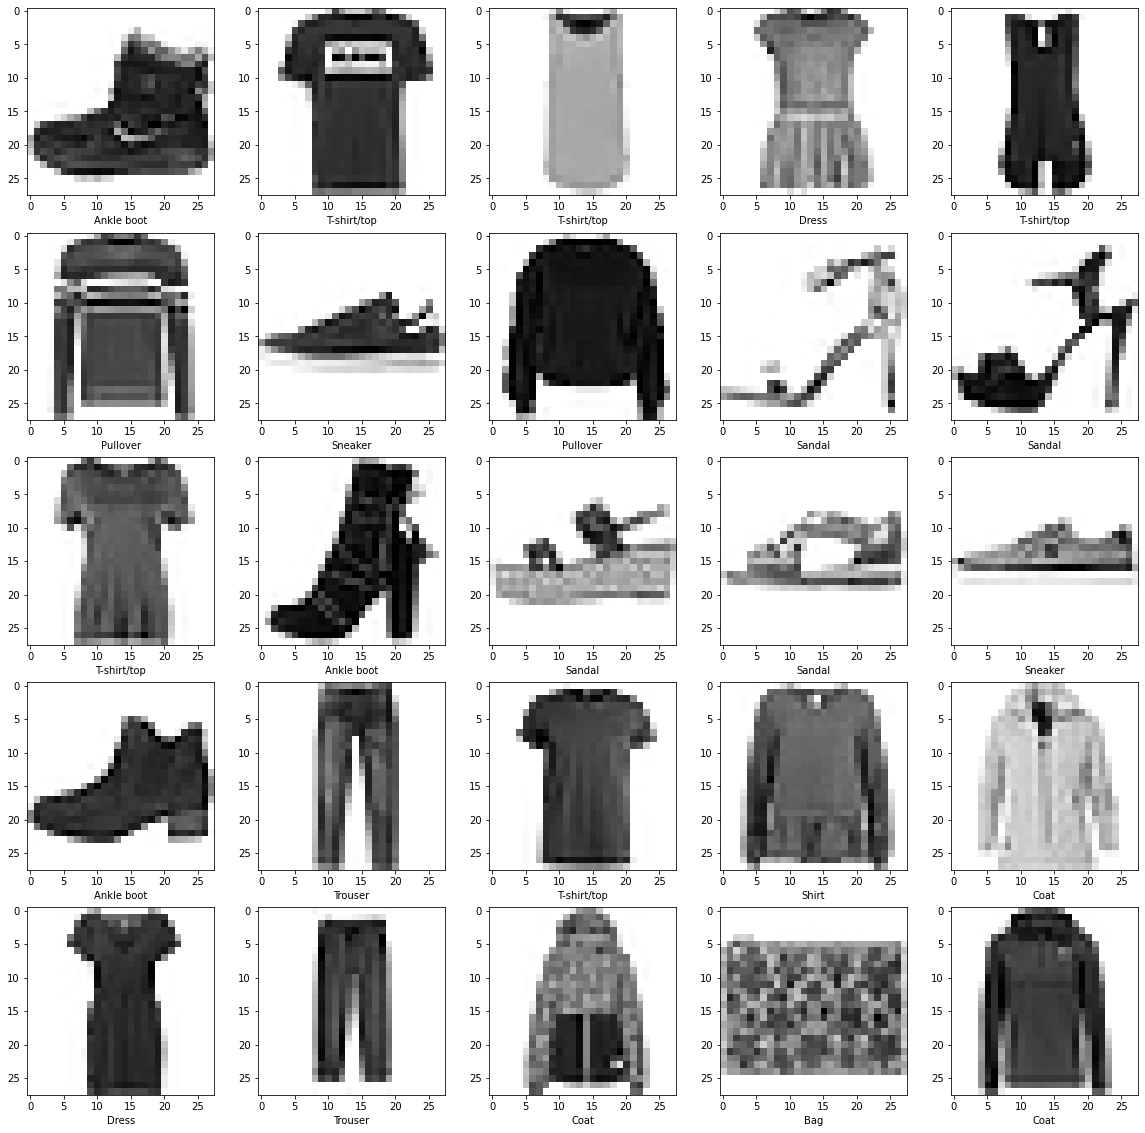

In [6]:
plt.figure('firstCouple', figsize=(20,20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.grid(False)
    # plt.xticks([])
    # plt.yticks([])
plt.show()

Build model

In [57]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape(target_shape=(28,28,1), input_shape=(28,28, 1)))
model.add(tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, activation = 'relu', groups=1, padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(
    optimizer=tf.keras.optimizers.Adam(), # 'adam', #
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'] # =[tf.keras.metrics.Accuracy()] #
    )

train model

In [58]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5129 - accuracy: 0.8154
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3834 - accuracy: 0.8613
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3436 - accuracy: 0.8728
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3161 - accuracy: 0.8837
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2938 - accuracy: 0.8903
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2740 - accuracy: 0.8972
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2568 - accuracy: 0.9031
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2393 - accuracy: 0.9102
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2243 - accuracy: 0.9150
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.208

evaluate accuracy of trained model by running it against the test set

In [59]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.4409 - accuracy: 0.8774


Append a softmax layer to the existing model to generate a probability model.

In [60]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

Capture predictions on test set

In [61]:
predictions = probability_model.predict(test_images)

Manually inspect how prediction matched up with verified test data truth

In [62]:
predictions[0]
print("predicted: {}, actual: {}".format(np.argmax(predictions[0]), test_labels[0]))

predicted: 9, actual: 9


Generate utility methods for plotting prediction inputs and results.

In [63]:
def plot_image(i, predictions_array, true_labels, imgs):
    true_label, img = true_labels[i], imgs[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = "red"
    if(predicted_label == true_label):
        color = "blue"
    
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]
    ), color = color)

def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    bar_plot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim(0,1)
    predicted_label = np.argmax(predictions_array)

    bar_plot[predicted_label].set_color('red')
    bar_plot[true_label].set_color('blue')


looking at the results for test case 1

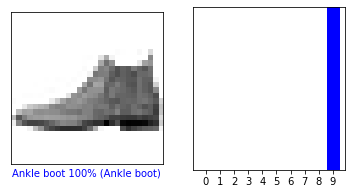

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

looking at another individual result

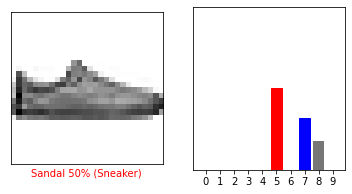

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

looking at the results from several test images

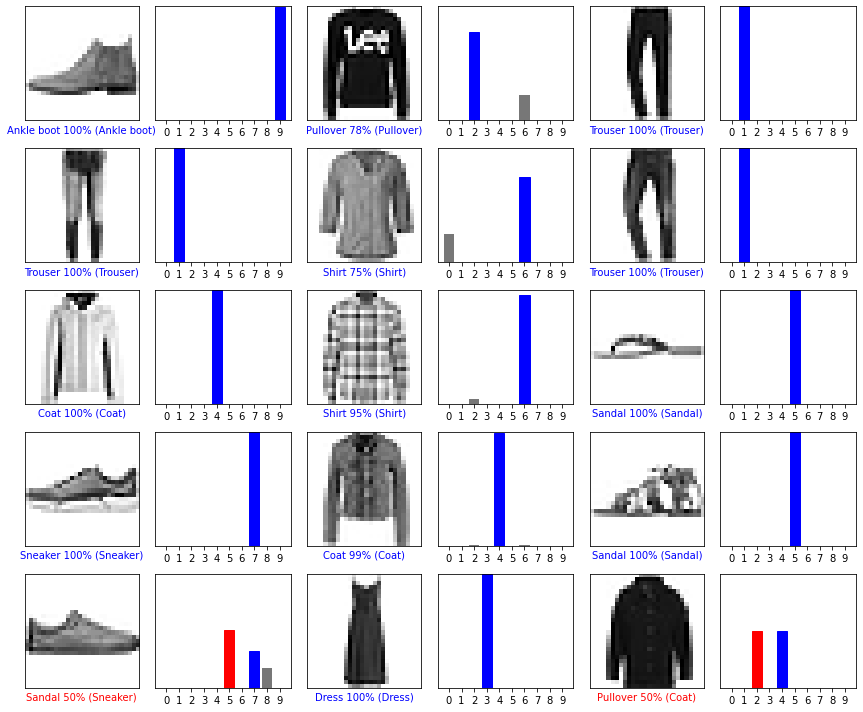

In [66]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure('multiple_results', figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2* num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
plt.show()


Then use the model on a single test image

In [67]:
img = test_images[1]
print(img.shape)

# put the image in its own list as required by keras
single_image_set = (np.expand_dims(img, 0))

print(single_image_set.shape)

(28, 28)
(1, 28, 28)


Then run the model on the single image set

[[2.4388846e-05 6.0721914e-13 7.7843839e-01 2.1196317e-10 2.3986325e-03
  9.8411559e-19 2.1913853e-01 2.0751882e-17 1.6912565e-13 4.8910295e-14]]


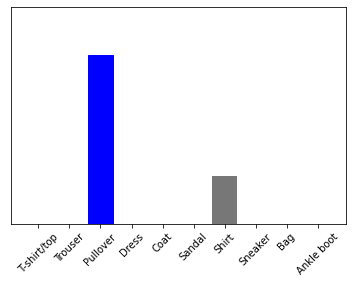

2


In [68]:
single_prediction = probability_model.predict(single_image_set)
print(single_prediction)

plt.figure()
plot_value_array(1, single_prediction[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

print(np.argmax(single_prediction[0]))

Lets try this with a raw image from the web

Affine Tranformation stuff: https://stackoverflow.com/questions/37584977/translate-image-using-pil


(1024, 1024)


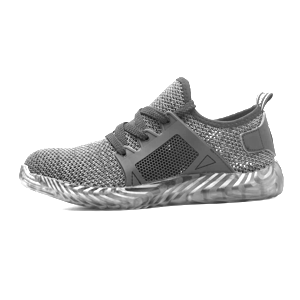

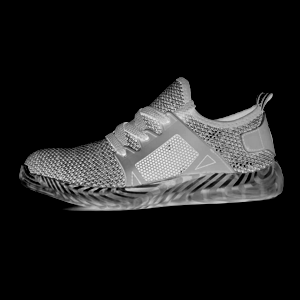

In [69]:
import PIL
from PIL import Image, ImageOps, ImageEnhance

raw_image = Image.open("./rawWildShoe.jpg")
print(raw_image.size)
cropped_image = raw_image.crop((10, 10, 1000, 1000))
resized_image = cropped_image.resize((300, 300))
# resized_image.show()
shifted_image = resized_image.transform(resized_image.size, PIL.Image.AFFINE, (1, 0,0,0,1, 50), fillcolor = 'white')
# shifted_image.show()
gray_image = ImageOps.grayscale(shifted_image)
light_gray_image = ImageEnhance.Brightness(gray_image).enhance(1.5)
light_gray_image.show()
reversed_image = ImageOps.invert(light_gray_image)
reversed_image.show()
small_gray_image = reversed_image.resize((28,28))
small_gray_image.show()


Continue formatting the image into something the model can use.

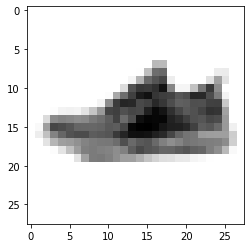

784


In [70]:
numpy_grey = np.array(small_gray_image)
numpy_grey = np.reshape(numpy_grey, (28,28))

plt.figure()
plt.imshow(numpy_grey, cmap=plt.cm.binary)
plt.show()

print(numpy_grey.size)

Next take that image and run it through the model

784


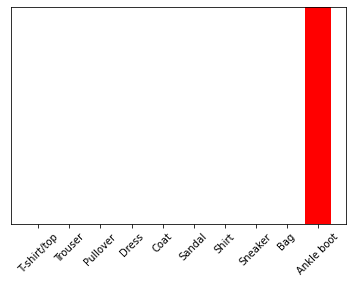

9
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [71]:
np_grey_set = (np.expand_dims(numpy_grey, 0))
print(np_grey_set.size)

wild_predict = probability_model.predict(np_grey_set)

plt.figure()
plot_value_array(0, wild_predict[0], [7])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

print(np.argmax(wild_predict[0]))
print(wild_predict)

## Understanding Layer Connections

raw_random shape: (20, 20)
expanded_random shape: (1, 20, 20)
reshaped_random shape: (1, 20, 20, 1)
conv_random shape: (1, 20, 20, 1)


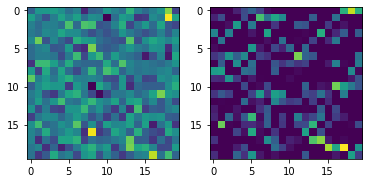

In [78]:
# debugging
input_shape = (20,20)
raw_random = tf.random.normal(input_shape)
print("raw_random shape: {}".format(raw_random.shape))
expanded_random = (np.expand_dims(raw_random, 0)) # (np.expand_dims((np.expand_dims(raw_random, 0)), 3))
print("expanded_random shape: {}".format(expanded_random.shape))

reshaped_random = tf.keras.layers.Reshape(target_shape=(20,20,1), input_shape=(20,20,1))(expanded_random)
print("reshaped_random shape: {}".format(reshaped_random.shape))

conv_random = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, activation = 'relu', groups=1, padding='same')(reshaped_random)
print("conv_random shape: {}".format(conv_random.shape))
plt.figure('hi')
plt.subplot(1,2,1)
plt.imshow(reshaped_random[0])
plt.subplot(1,2,2)
plt.imshow(conv_random[0])
plt.show()


raw image shape: (28, 28)
expanded_image shape: (1, 28, 28)
reshaped_image shape: (1, 28, 28, 1)
convolved_image shape: (1, 28, 28, 1)


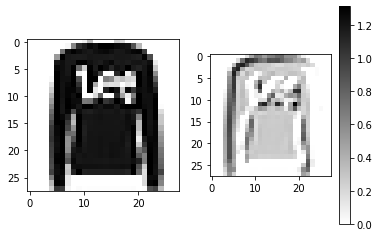

In [87]:
raw_image = test_images[1]
print("raw image shape: {}".format(raw_image.shape))
expanded_image = (np.expand_dims(raw_image, 0))
print("expanded_image shape: {}".format(expanded_image.shape))
reshaped_image = tf.keras.layers.Reshape(target_shape=(28,28,1), input_shape=(28,28,1))(expanded_image)
print("reshaped_image shape: {}".format(reshaped_image.shape))

convolved_image = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, activation = 'relu', groups=1, padding='same')(reshaped_image)
print("convolved_image shape: {}".format(convolved_image.shape))
plt.figure('hi')
plt.subplot(1,2,1)
plt.imshow(reshaped_image[0], cmap=plt.cm.binary)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(convolved_image[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()